In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
start = '2006-01-01'
end = '2019-01-01'

In [24]:
bac = data.DataReader("BAC", 'yahoo', start, end)
c = data.DataReader("C", 'yahoo', start, end)
gs = data.DataReader("GS", 'yahoo', start, end)
jpm = data.DataReader("JPM", 'yahoo', start, end)
ms = data.DataReader("MS", 'yahoo', start, end)
wfc = data.DataReader("WFC", 'yahoo', start, end)

In [3]:
tickers = ['BAC', 'C', 'GS','JPM', 'MS','WFC' ]

In [4]:
bank_stocks = pd.concat([bac,c,gs,jpm,ms,wfc], axis =1, keys=tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.953278   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.571438   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.617275   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.563797   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.586720   

                     C                                        ...      \
                  High         Low        Open       Close    ...       
Date                                                          ...       
2006-01-03  493.799988  481.100006  490.000000  492.899994    ...       
2006-01-04  491.000000  483.500000  488.600006  483.799988    ...       
2006-01-05  487.799988  484.000000  484.399994  486.200012    ...       
2006-01-06  489.000000  482.000000  488.799988  486.200012    ...       
2006-01-09  487.399994  483.000000  486.000000  483.899994    ...       

                   MS                                         WFC             \
                 Open      Close     Volume  Adj Close       High        Low   
Date                                                                           
2006-01-03  57.169998  58.310001  5377000.0  38.292645  31.975000  31.195000   
2006-01-04  58.700001  58.349998  7977800.0  38.318924  31.820000  31.365000   
2006-01-05  58.549999  58.509998  5778000.0  38.423988  31.555000  31.309999   
2006-01-06  58.770000  58.570000  6889800.0  38.463394  31.775000  31.385000   
2006-01-09  58.630001  59.189999  4144500.0  38.870537  31.825001  31.555000   

                                                         
                 Open      Close      Volume  Adj Close  
Date                                                     
2006-01-03  31.600000  31.900000  11016400.0  21.246769  
2006-01-04  31.799999  31.530001  10870000.0  21.000326  
2006-01-05  31.500000  31.495001  10158000.0  20.977020  
2006-01-06  31.580000  31.680000   8403800.0  21.100231  
2006-01-09  31.674999  31.674999   5619600.0  21.096903  

[5 rows x 36 columns]

In [5]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [6]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

In [8]:
returns = pd.DataFrame(
    
)
returns

""


In [33]:
for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()


,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


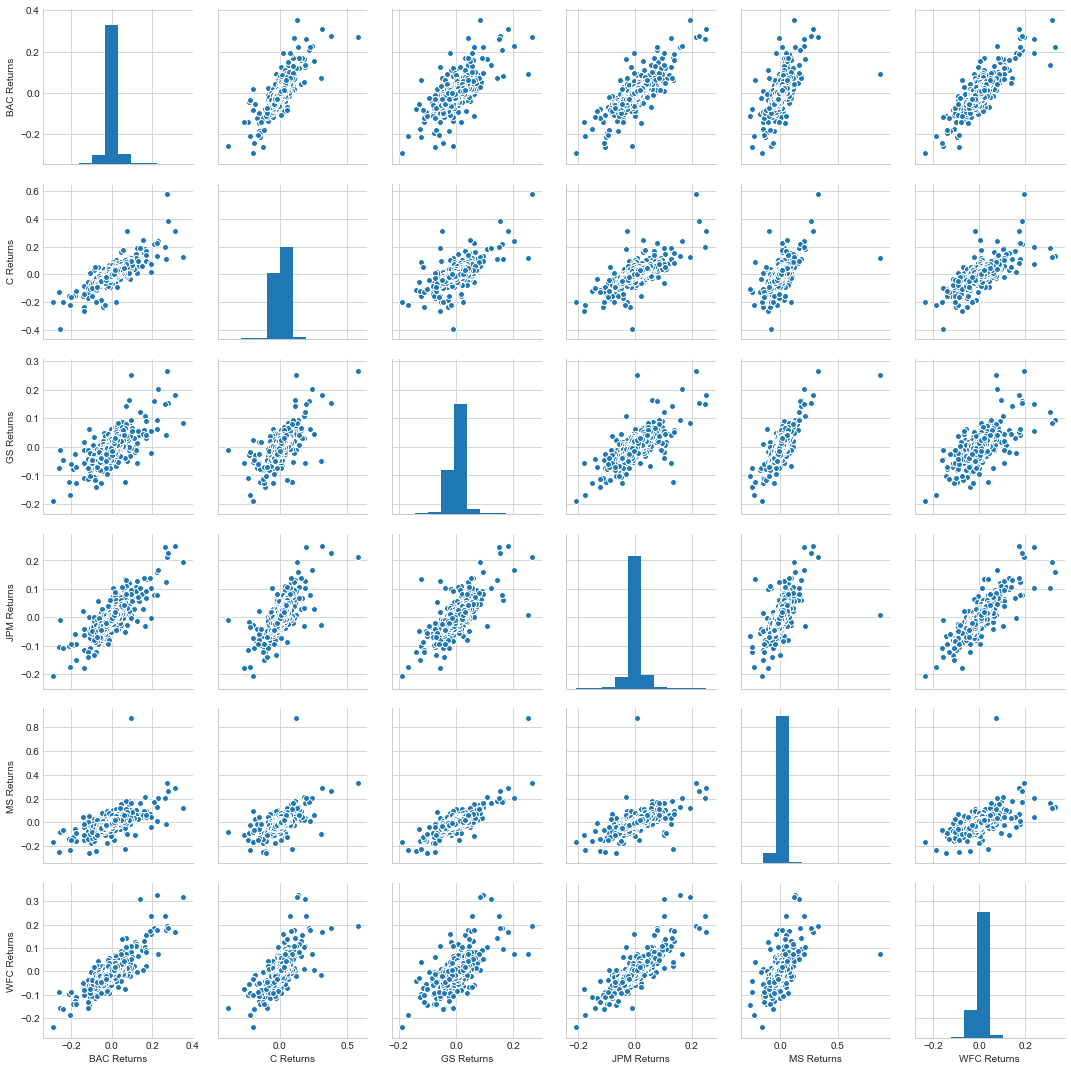

In [34]:
sns.pairplot(data = returns[1:])

In [11]:
returns.idxmin()

BACReturns   2009-01-20
CReturns     2009-02-27
GSReturns    2009-01-20
JPMReturns   2009-01-20
MSReturns    2008-10-09
WFCReturns   2009-01-20
dtype: datetime64[ns]

In [35]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [12]:
returns.std()

BACReturns    0.033124
CReturns      0.034762
GSReturns     0.023455
JPMReturns    0.025106
MSReturns     0.034185
WFCReturns    0.027336
dtype: float64

In [36]:
returns.ix['2015-01-01':'2015-12-31'].std()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


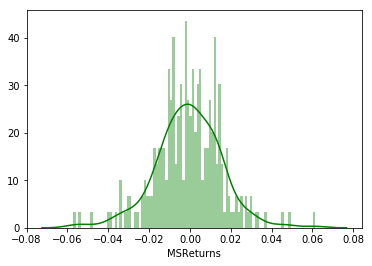

In [13]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MSReturns'],color='green',bins=100)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


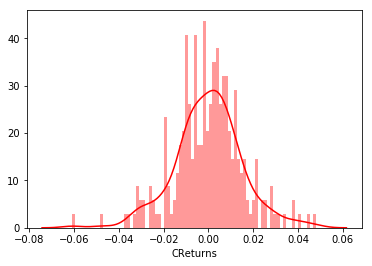

In [14]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['CReturns'],color='red',bins=80);

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

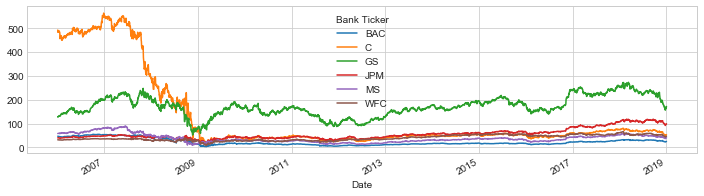

In [16]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').plot(figsize=(12,3))

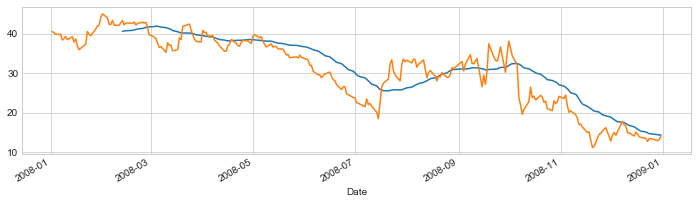

In [17]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').loc['2008-01-01':'2008-12-31']['BAC'].rolling(30).mean().plot(figsize=(12,3))
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').loc['2008-01-01':'2008-12-31']['BAC'].plot()

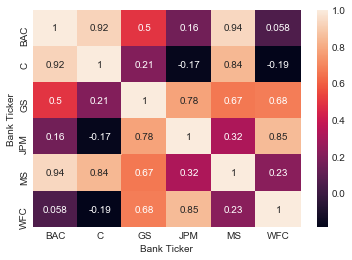

In [18]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

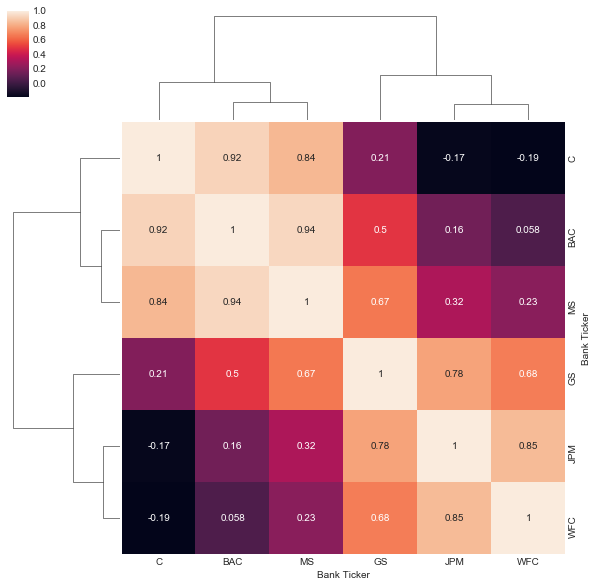

In [19]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [37]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [21]:
bac[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [39]:
ms['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [40]:
bac['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

